# Librerias

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos

In [16]:
columnas = ["Longitude", "Latitude", "Age", "Rooms", "Bedrooms", "Population","Households", "Income","Value"]
datos = pd.read_csv("cal_housing.data",
                   sep = ',',
                   names = columnas,
                   na_values = "?")
datos.head(30)

,Longitude,Latitude,Age,Rooms,Bedrooms,Population,Households,Income,Value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longitude   20640 non-null  float64
 1   Latitude    20640 non-null  float64
 2   Age         20640 non-null  float64
 3   Rooms       20640 non-null  float64
 4   Bedrooms    20640 non-null  float64
 5   Population  20640 non-null  float64
 6   Households  20640 non-null  float64
 7   Income      20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Dividir datos en datos de entrenamiento y prueba

In [21]:
X = datos.drop('Value', axis = 1)
y = datos['Value']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 42)

# Crear el arbol de regresion: 

In [26]:
regresor = DecisionTreeRegressor(max_depth = 5, random_state = 42)
regresor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

# Realizar predicciones

In [29]:
predicciones = regresor.predict(X_test)

# Evaluamos el modelo

In [47]:
mse = mean_squared_error(y_test, predicciones)
score = regresor.score(X_test, y_test)
print("Error al cuadrado medio (MSE): ", mse)
print("Score R2: ", score)

Error al cuadrado medio (MSE):  5592763202.743439
Score R2:  0.5732047554915876


# Visualizacion de la importancia de las carcateristicas

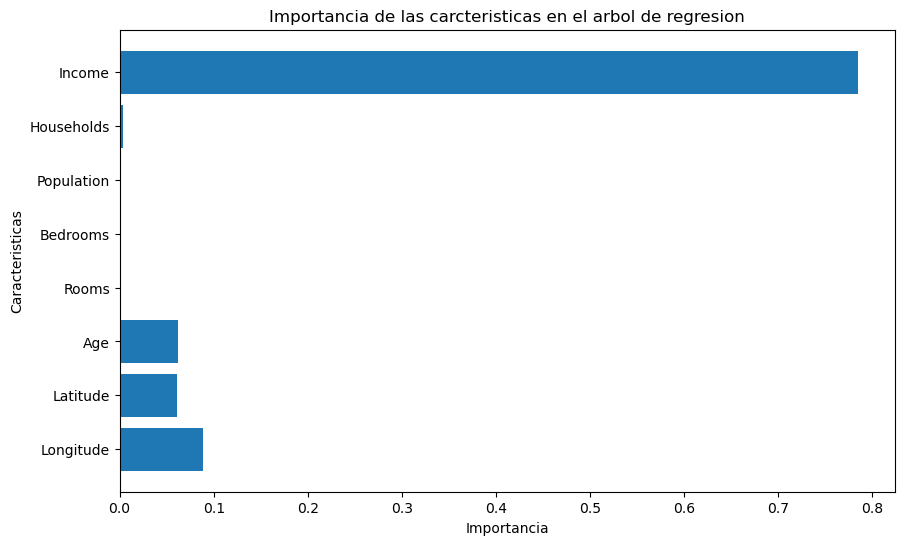

In [41]:
plt.figure(figsize = (10, 6))
plt.barh(X.columns, regresor.feature_importances_)
plt.xlabel("Importancia")
plt.ylabel("Caracteristicas")
plt.title("Importancia de las carcteristicas en el arbol de regresion")
plt.show()